# Import

In [359]:
import pandas as pd

In [360]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

font_path = "C:/Windows/Fonts/malgun.ttf"

# Load Data

In [361]:
train_df = pd.read_csv("../../data/train.csv")
test_df = pd.read_csv("../../data/test.csv")  
submission = pd.read_csv("../../data/sample_submission.csv")  

In [362]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54609 entries, 0 to 54608
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      54609 non-null  object
 1   분류      54609 non-null  object
 2   제목      54609 non-null  object
 3   키워드     54609 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [363]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23405 entries, 0 to 23404
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      23405 non-null  object
 1   제목      23405 non-null  object
 2   키워드     23405 non-null  object
dtypes: object(3)
memory usage: 548.7+ KB


In [364]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23405 entries, 0 to 23404
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      23405 non-null  object
 1   분류      23405 non-null  object
dtypes: object(2)
memory usage: 365.8+ KB


In [365]:
len(train_df['분류'].value_counts())

56

타겟변수 -> '분류'이고 종류 56가지

In [366]:
test_df.head()

ID                                                 제목  \
0  TEST_00000                                     [부고] 김태수씨 별세 외   
1  TEST_00001             신규 확진 나흘째 세자릿수... 방역당국, 핼러윈 풍선효과 차단 총력   
2  TEST_00002  [서경이 만난 사람] 전해철 장관 "재정분권 강화 '지방자치 2.0 시대' 마중물 ...   
3  TEST_00003                   용인시, 12일 '장애인 구인 구직 만남의 날' 채용 행사   
4  TEST_00004                             지자체 벽 터 경기지역 산단 활성화 모색   

                                                 키워드  
0  김태수,별세,김태수씨,서울,광남초등학,교장,별세,김윤정,이노코리아,대표,희정,한성대...  
1  신규,확진,나흘,세자릿수,방역당국,핼러윈,풍선,효과,차단,총력,감염증,신종,코로나바...  
2  전해철,장관,재정,분권,강화,지방자치,2.0,시대,마중물,마련,장관,전해철,행정안전...  
3  용인시,구인,장애인,구직,만남,채용,행사,노호근,용인특례시,장애인,취업,지원,대회의...  
4  지자체,경기,북동부,지역,산업단지,혁신단위,설정,전략,지역,연계,특성,제시,경기도경...

In [367]:
train_df['키워드'][0]

'용인문화재단,인문학,콘서트,뮤지컬,이야기,개최,인문학,콘서트,뮤지컬,이야기,용인문화재단,용인문화재단,제공,시민들,심신,여유,안정,인문학,콘서트,개최,재단,18일,큰어울마당,용인시,평생,학습관,인문학,콘서트,뮤지컬,이야기,인문학,콘서트,방송,매체,왕성,활동,뮤지컬,평론가,교수,원종원,순천향대,진행,이건명,김소향,김보경,유건우,배우들,정상급,뮤지컬,배우,라이브,무대,동시,만끽,공연,공연,홍지민,뮤지컬,배우,참여,라이브,무대,선사,영화,뮤지컬,합성어,무비컬,주제,맘마미아,드림걸즈,유명,작품,교수,위트,해설,예정,공연,초등학생,관람,초등학생,가능,티켓,가격,전석,공연,용인문화재단,누리집,확인'

In [368]:
train_df['분류'].value_counts()

지역               26950
경제:부동산            3454
사회:사건_사고          2568
경제:반도체            2318
사회:사회일반           1480
사회:교육_시험           995
정치:국회_정당           966
사회:의료_건강           950
경제:취업_창업           845
스포츠:올림픽_아시안게임      841
경제:산업_기업           711
문화:전시_공연           671
경제:자동차             640
경제:경제일반            625
사회:장애인             621
스포츠:골프             617
정치:선거              608
경제:유통              589
IT_과학:모바일          537
사회:여성              536
사회:노동_복지           447
사회:환경              396
경제:서비스_쇼핑          387
경제:무역              375
정치:행정_자치           349
국제                 337
문화:방송_연예           335
스포츠:축구             328
경제:금융_재테크          327
정치:청와대             279
문화:출판              248
IT_과학:IT_과학일반      243
IT_과학:인터넷_SNS      238
문화:미술_건축           229
정치:정치일반            221
IT_과학:과학           215
문화:문화일반            213
문화:학술_문화재          202
문화:요리_여행           190
경제:자원              178
문화:종교              173
IT_과학:콘텐츠          160
사회:미디어             128
사회:날씨      

In [369]:
# 카테고리 리스트
categories = [
    "지역", "경제:부동산", "사회:사건_사고", "경제:반도체", "사회:사회일반",
    "사회:교육_시험", "정치:국회_정당", "사회:의료_건강", "경제:취업_창업",
    "스포츠:올림픽_아시안게임", "경제:산업_기업", "문화:전시_공연",
    "경제:자동차", "경제:경제일반", "사회:장애인", "스포츠:골프",
    "정치:선거", "경제:유통", "IT_과학:모바일", "사회:여성",
    "사회:노동_복지", "사회:환경", "경제:서비스_쇼핑", "경제:무역",
    "정치:행정_자치", "국제", "문화:방송_연예", "스포츠:축구",
    "경제:금융_재테크", "정치:청와대", "문화:출판", "IT_과학:IT_과학일반",
    "IT_과학:인터넷_SNS", "문화:미술_건축", "정치:정치일반", "IT_과학:과학",
    "문화:문화일반", "문화:학술_문화재", "문화:요리_여행", "경제:자원",
    "문화:종교", "IT_과학:콘텐츠", "사회:미디어", "사회:날씨",
    "스포츠:농구_배구", "문화:음악", "문화:생활", "IT_과학:보안",
    "스포츠:월드컵", "경제:증권_증시", "정치:북한", "정치:외교",
    "스포츠:스포츠일반", "문화:영화", "스포츠:야구", "경제:외환"
]

# 딕셔너리 생성
dict_label = {i + 1: category for i, category in enumerate(categories)}

# 결과 출력
print(dict_label)

{1: '지역', 2: '경제:부동산', 3: '사회:사건_사고', 4: '경제:반도체', 5: '사회:사회일반', 6: '사회:교육_시험', 7: '정치:국회_정당', 8: '사회:의료_건강', 9: '경제:취업_창업', 10: '스포츠:올림픽_아시안게임', 11: '경제:산업_기업', 12: '문화:전시_공연', 13: '경제:자동차', 14: '경제:경제일반', 15: '사회:장애인', 16: '스포츠:골프', 17: '정치:선거', 18: '경제:유통', 19: 'IT_과학:모바일', 20: '사회:여성', 21: '사회:노동_복지', 22: '사회:환경', 23: '경제:서비스_쇼핑', 24: '경제:무역', 25: '정치:행정_자치', 26: '국제', 27: '문화:방송_연예', 28: '스포츠:축구', 29: '경제:금융_재테크', 30: '정치:청와대', 31: '문화:출판', 32: 'IT_과학:IT_과학일반', 33: 'IT_과학:인터넷_SNS', 34: '문화:미술_건축', 35: '정치:정치일반', 36: 'IT_과학:과학', 37: '문화:문화일반', 38: '문화:학술_문화재', 39: '문화:요리_여행', 40: '경제:자원', 41: '문화:종교', 42: 'IT_과학:콘텐츠', 43: '사회:미디어', 44: '사회:날씨', 45: '스포츠:농구_배구', 46: '문화:음악', 47: '문화:생활', 48: 'IT_과학:보안', 49: '스포츠:월드컵', 50: '경제:증권_증시', 51: '정치:북한', 52: '정치:외교', 53: '스포츠:스포츠일반', 54: '문화:영화', 55: '스포츠:야구', 56: '경제:외환'}


In [370]:
# '분류' 열에서 앞부분만 추출하여 '분류_대분류'라는 새로운 열에 저장
train_df['분류_대분류'] = train_df['분류'].apply(lambda x: x.split(':')[0])

# 결과 확인
train_df['분류_대분류'].value_counts()

지역       26950
경제       10534
사회        8245
정치        2521
문화        2500
스포츠       2035
IT_과학     1487
국제         337
Name: 분류_대분류, dtype: int64

In [371]:
train_df["분류"].nunique()
train_df["분류"].value_counts().sort_index().index
train_df["분류"].value_counts().sort_index().values 
train_df["분류"].value_counts(normalize=True).sort_index().values

train_df.groupby("분류").mean().reset_index()

C:\Users\juneh\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


분류
0   IT_과학:IT_과학일반
1        IT_과학:과학
2       IT_과학:모바일
3        IT_과학:보안
4   IT_과학:인터넷_SNS
5       IT_과학:콘텐츠
6         경제:경제일반
7       경제:금융_재테크
8           경제:무역
9          경제:반도체
10         경제:부동산
11       경제:산업_기업
12      경제:서비스_쇼핑
13          경제:외환
14          경제:유통
15         경제:자동차
16          경제:자원
17       경제:증권_증시
18       경제:취업_창업
19             국제
20        문화:문화일반
21       문화:미술_건축
22       문화:방송_연예
23          문화:생활
24          문화:영화
25       문화:요리_여행
26          문화:음악
27       문화:전시_공연
28          문화:종교
29          문화:출판
30      문화:학술_문화재
31       사회:교육_시험
32          사회:날씨
33       사회:노동_복지
34         사회:미디어
35       사회:사건_사고
36        사회:사회일반
37          사회:여성
38       사회:의료_건강
39         사회:장애인
40          사회:환경
41         스포츠:골프
42      스포츠:농구_배구
43      스포츠:스포츠일반
44         스포츠:야구
45  스포츠:올림픽_아시안게임
46        스포츠:월드컵
47         스포츠:축구
48       정치:국회_정당
49          정치:북한
50          정치:선거
51          정치:외교
52        정치:정치일반
53         정치:청와대
54       정치:행정_자치
55             지역

In [372]:
### wordcloud 설치가 필요할 경우 : 
# %pip install wordcloud

In [373]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import math

# # 'text' 열 생성: '키워드' 열의 단어들을 쉼표로 구분하여 저장
# train_df['text'] = train_df['키워드'].apply(lambda x: " ".join(x.split(',')))

# num_categories = train_df["분류"].nunique()
# num_cols = 5
# num_rows = math.ceil(num_categories / num_cols)

# fig = plt.figure(figsize=(num_cols * 4, num_rows * 4))


# for w in range(num_categories):
#     text_wc = " ".join(train_df.loc[train_df["분류"] == train_df["분류"].unique()[w], "text"].tolist())
    
#     ax = fig.add_subplot(num_rows, num_cols, w + 1)
#     wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400, max_words=500)
#     wc.generate(text_wc)

#     ax.imshow(wc, interpolation='bilinear')
#     ax.axis("off")
#     ax.text(0.5, -0.1, str(w + 1) + "_" + dict_label.get(w + 1, ""), size=10, ha="center", transform=ax.transAxes)

# plt.show()

In [374]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import math

# # 'text' 열 생성: '키워드' 열의 단어들을 쉼표로 구분하여 저장
# train_df['text'] = train_df['키워드'].apply(lambda x: " ".join(x.split(',')))

# num_categories = train_df["분류_대분류"].nunique()
# num_cols = 5
# num_rows = math.ceil(num_categories / num_cols)

# fig = plt.figure(figsize=(num_cols * 4, num_rows * 4))



# for w in range(num_categories):
#     text_wc = " ".join(train_df.loc[train_df["분류_대분류"] == train_df["분류_대분류"].unique()[w], "text"].tolist())
    
#     ax = fig.add_subplot(num_rows, num_cols, w + 1)
#     wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400, max_words=500)
#     wc.generate(text_wc)

#     ax.imshow(wc, interpolation='bilinear')
#     ax.axis("off")
#     ax.text(0.5, -0.1, str(w + 1) + "_" + dict_label.get(w + 1, ""), size=10, ha="center", transform=ax.transAxes)

# plt.show()

In [375]:
from collections import Counter

def find_common_words_and_remove(num_categories=8, top_n=10, com_counts=10, train_df=train_df, test_df=test_df):
    # '분류_대분류'의 각 범주에 속하는 단어들을 추출
    category_words = {category: [] for category in train_df["분류_대분류"].unique()}

    for category in category_words.keys():
        words = train_df.loc[train_df["분류_대분류"] == category, "키워드"].apply(lambda x: x.split(',')).tolist()
        category_words[category] = [word for sublist in words for word in sublist]

    # 각 범주에 속하는 단어들을 카운팅
    word_counts = {category: Counter(words) for category, words in category_words.items()}

    # 지정된 범주 갯수에 속하는 단어들을 찾기
    '''  이때 범주별 10회 이상 등장한 단어만을 고려 '''
    common_words = set()
    for word in word_counts[list(word_counts.keys())[0]].keys():
        count = sum(1 for category in word_counts.keys() if word in word_counts[category] and word_counts[category][word] >= com_counts)
        if count == num_categories:
            common_words.add(word)

    # 지정된 범주 갯수에 속하는 단어와 그 갯수를 계산
    common_word_counts = {word: sum(word_counts[category][word] for category in word_counts.keys()) for word in common_words}

    # 단어들을 갯수 기준으로 정렬하고 상위 N개를 선택
    top_common_words = sorted(common_word_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    print(f"상위 {top_n}개의 단어 확인")

    # 상위 N개의 단어와 그 갯수, 그리고 각 범주에서의 갯수를 출력
    for word, total_count in top_common_words:
        category_counts = {category: word_counts[category][word] for category in word_counts.keys()}
        print(f"단어: {word}, 총 갯수: {total_count}, 각 범주에서의 갯수: {category_counts}")
        
    # 총 몇 개의 단어가 겹치는지 출력
    print(f"총 {len(common_words)}개의 단어가 겹칩니다.")

    # top_n 기준으로 겹치는 단어들을 '키워드' 열에서 제거하고 새로운 열에 저장
    top_common_words_set = set(word for word, _ in top_common_words)
    
    def remove_top_common_words(keywords):
        return ', '.join([word for word in keywords.split(',') if word not in top_common_words_set])

    train_df['키워드'] = train_df['키워드'].apply(remove_top_common_words)
    test_df['키워드'] = test_df['키워드'].apply(remove_top_common_words)

# 함수 호출 예시
# find_common_words_and_remove(num_categories=7, top_n=10, com_counts=10)

In [376]:
# 함수 호출 예시
find_common_words_and_remove(num_categories=8, top_n=59, com_counts=50)

상위 59개의 단어 확인
단어: 용인시, 총 갯수: 102752, 각 범주에서의 갯수: {'문화': 4000, '지역': 57286, '국제': 472, '정치': 3871, '경제': 18940, '사회': 12329, '스포츠': 2659, 'IT_과학': 3195}
단어: 용인, 총 갯수: 68534, 각 범주에서의 갯수: {'문화': 3417, '지역': 35179, '국제': 272, '정치': 3777, '경제': 19462, '사회': 4054, '스포츠': 1182, 'IT_과학': 1191}
단어: 지역, 총 갯수: 52184, 각 범주에서의 갯수: {'문화': 1356, '지역': 28497, '국제': 123, '정치': 3158, '경제': 12855, '사회': 5125, '스포츠': 172, 'IT_과학': 898}
단어: 지원, 총 갯수: 51558, 각 범주에서의 갯수: {'문화': 523, '지역': 31031, '국제': 99, '정치': 1729, '경제': 12820, '사회': 4003, '스포츠': 264, 'IT_과학': 1089}
단어: 시장, 총 갯수: 48773, 각 범주에서의 갯수: {'문화': 1625, '지역': 25503, '국제': 323, '정치': 4024, '경제': 13296, '사회': 2243, '스포츠': 803, 'IT_과학': 956}
단어: 경기도, 총 갯수: 44481, 각 범주에서의 갯수: {'문화': 1265, '지역': 25248, '국제': 124, '정치': 2266, '경제': 9328, '사회': 3918, '스포츠': 1760, 'IT_과학': 572}
단어: 경기, 총 갯수: 39922, 각 범주에서의 갯수: {'문화': 1059, '지역': 15621, '국제': 226, '정치': 2266, '경제': 9415, '사회': 7204, '스포츠': 3523, 'IT_과학': 608}
단어: 계획, 총 갯수: 34875, 각 범주에서의 갯수: {'문화': 426, '지역

In [377]:

find_common_words_and_remove(num_categories=7, top_n=51, com_counts=100)

상위 51개의 단어 확인
단어:  도시, 총 갯수: 26921, 각 범주에서의 갯수: {'문화': 469, '지역': 18436, '국제': 154, '정치': 1349, '경제': 5129, '사회': 1091, '스포츠': 43, 'IT_과학': 250}
단어:  운영, 총 갯수: 26495, 각 범주에서의 갯수: {'문화': 1171, '지역': 14609, '국제': 36, '정치': 641, '경제': 4857, '사회': 3757, '스포츠': 228, 'IT_과학': 1196}
단어:  대상, 총 갯수: 20755, 각 범주에서의 갯수: {'문화': 798, '지역': 11676, '국제': 41, '정치': 583, '경제': 3910, '사회': 2740, '스포츠': 201, 'IT_과학': 806}
단어:  센터, 총 갯수: 17850, 각 범주에서의 갯수: {'문화': 248, '지역': 10044, '국제': 40, '정치': 211, '경제': 3954, '사회': 2190, '스포츠': 324, 'IT_과학': 839}
단어:  마련, 총 갯수: 17738, 각 범주에서의 갯수: {'문화': 962, '지역': 10148, '국제': 36, '정치': 708, '경제': 3697, '사회': 1566, '스포츠': 131, 'IT_과학': 490}
단어:  제공, 총 갯수: 17180, 각 범주에서의 갯수: {'문화': 749, '지역': 7918, '국제': 46, '정치': 462, '경제': 4266, '사회': 2144, '스포츠': 196, 'IT_과학': 1399}
단어:  정부, 총 갯수: 16084, 각 범주에서의 갯수: {'문화': 187, '지역': 5560, '국제': 130, '정치': 1953, '경제': 6353, '사회': 1689, '스포츠': 6, 'IT_과학': 206}
단어:  선정, 총 갯수: 15941, 각 범주에서의 갯수: {'문화': 537, '지역': 11030, '국제': 14, '정치':

In [378]:

find_common_words_and_remove(num_categories=6, top_n=2, com_counts=500)

상위 2개의 단어 확인
단어:   사업, 총 갯수: 52397, 각 범주에서의 갯수: {'문화': 558, '지역': 35868, '국제': 20, '정치': 1096, '경제': 11134, '사회': 2669, '스포츠': 33, 'IT_과학': 1019}
단어:   교육, 총 갯수: 19085, 각 범주에서의 갯수: {'문화': 666, '지역': 8379, '국제': 17, '정치': 528, '경제': 2821, '사회': 5667, '스포츠': 46, 'IT_과학': 961}
총 2개의 단어가 겹칩니다.


In [379]:
# 함수 호출 예시
# find_common_words_and_remove(num_categories=3, top_n=3, com_counts=2000)

In [380]:
# 함수 호출 예시
# find_common_words_and_remove(num_categories=2, top_n=2, com_counts=10000)

In [381]:
from collections import Counter

def count_top_keywords(train_df, top_n=10):
    # 모든 행의 '키워드' 열의 단어들을 추출
    all_keywords = train_df['키워드'].apply(lambda x: x.split(',')).tolist()
    all_keywords_flat = [word.strip() for sublist in all_keywords for word in sublist]

    # 단어들을 카운팅
    keyword_counts = Counter(all_keywords_flat)

    # 단어들을 갯수 기준으로 정렬하고 상위 N개를 선택
    top_keywords = keyword_counts.most_common(top_n)

    # 상위 N개의 단어와 그 갯수를 출력
    for word, count in top_keywords:
        print(f"단어: {word}, 갯수: {count}")

# 함수 호출 예시
count_top_keywords(train_df, top_n=10)

단어: 반도체, 갯수: 47196
단어: 조성, 갯수: 30197
단어: 산업, 갯수: 25098
단어: 추진, 갯수: 24317
단어: 단지, 갯수: 22869
단어: 시설, 갯수: 22664
단어: 아파트, 갯수: 18334
단어: 설치, 갯수: 16633
단어: 처인구, 갯수: 16357
단어: 안전, 갯수: 15313


In [382]:
count_top_keywords(test_df, top_n=10)

단어: 반도체, 갯수: 20285
단어: 조성, 갯수: 12321
단어: 산업, 갯수: 10856
단어: 추진, 갯수: 10529
단어: 단지, 갯수: 9927
단어: 시설, 갯수: 9847
단어: 아파트, 갯수: 7671
단어: 설치, 갯수: 7571
단어: 처인구, 갯수: 7257
단어: 확진자, 갯수: 6611


In [383]:
from collections import Counter

def count_and_remove_low_occurrence_keywords(train_df, test_df, threshold=3):
    # '키워드' 열의 각 값을 쉼표로 분리하여 리스트로 변환
    train_df['키워드_리스트'] = train_df['키워드'].apply(lambda x: x.split(','))
    test_df['키워드_리스트'] = test_df['키워드'].apply(lambda x: x.split(','))

    # '분류_대분류' 별로 단어들을 추출하고 카운팅
    category_keywords = {category: [] for category in train_df["분류_대분류"].unique()}

    for category in category_keywords.keys():
        words = train_df.loc[train_df["분류_대분류"] == category, "키워드_리스트"].tolist()
        category_keywords[category] = [word.strip() for sublist in words for word in sublist]

    # 각 '분류_대분류' 별로 단어들을 카운팅하고 단어가 threshold 이하로 존재하는 경우를 찾기
    low_occurrence_words = set()
    for category, words in category_keywords.items():
        word_counts = Counter(words)
        low_occurrence_words.update({word for word, count in word_counts.items() if count <= threshold})

    # 단어가 threshold 이하로 존재하는 경우를 '키워드' 열에서 제거
    def remove_low_occurrence_words(keywords):
        return ', '.join([word.strip() for word in keywords.split(',') if word.strip() not in low_occurrence_words])

    train_df['키워드'] = train_df['키워드'].apply(remove_low_occurrence_words)

    # test_df에서도 동일한 단어를 제거
    def remove_low_occurrence_words_from_test(keywords):
        return ', '.join([word.strip() for word in keywords.split(',') if word.strip() not in low_occurrence_words])

    test_df['키워드'] = test_df['키워드'].apply(remove_low_occurrence_words_from_test)

    # 제거 후 각 '분류_대분류' 별로 하위 10개의 단어와 그 갯수를 출력
    for category in category_keywords.keys():
        words = train_df.loc[train_df["분류_대분류"] == category, "키워드"].apply(lambda x: x.split(',')).tolist()
        words = [word.strip() for sublist in words for word in sublist]
        word_counts = Counter(words)
        bottom_keywords = word_counts.most_common()[:-11:-1]
        print(f"분류_대분류: {category}")
        for word, count in bottom_keywords:
            print(f"  단어: {word}, 갯수: {count}")
        print()

# 함수 호출 예시
count_and_remove_low_occurrence_keywords(train_df, test_df, threshold=2)

분류_대분류: 문화
  단어: , 갯수: 1
  단어: 대상어, 갯수: 3
  단어: 우서일절, 갯수: 3
  단어: 오수경, 갯수: 3
  단어: 칠순잔치, 갯수: 3
  단어: 서병덕, 갯수: 3
  단어: 김옹, 갯수: 3
  단어: Docs, 갯수: 3
  단어: 위작, 갯수: 3
  단어: 용자봉, 갯수: 3

분류_대분류: 지역
  단어: 000건, 갯수: 3
  단어: So-ro, 갯수: 3
  단어: 온세미, 갯수: 3
  단어: 모멘트, 갯수: 3
  단어: 통합데이터센터, 갯수: 3
  단어: 통합데이터, 갯수: 3
  단어: 임의장, 갯수: 3
  단어: 강서대, 갯수: 3
  단어: 닭칼국수, 갯수: 3
  단어: 요금군, 갯수: 3

분류_대분류: 국제
  단어: 낭비, 갯수: 3
  단어: 조선인, 갯수: 3
  단어: 트럼프행정부, 갯수: 3
  단어: 아시아인들, 갯수: 3
  단어: 주씨, 갯수: 3
  단어: 호감도, 갯수: 3
  단어: 따오기, 갯수: 3
  단어: 윌리엄슨카운티, 갯수: 3
  단어: 패어펙스카운티, 갯수: 3
  단어: 오세올라카운티, 갯수: 3

분류_대분류: 정치
  단어: 법률비서관, 갯수: 3
  단어: 2교시, 갯수: 3
  단어: 총괄부위원장, 갯수: 3
  단어: 열병식, 갯수: 3
  단어: 전봉학, 갯수: 3
  단어: 지방지, 갯수: 3
  단어: 수원갈비, 갯수: 3
  단어: 일탈행동, 갯수: 3
  단어: bureaus, 갯수: 3
  단어: notice, 갯수: 3

분류_대분류: 경제
  단어: , 갯수: 1
  단어: 강만희, 갯수: 3
  단어: 갓슬라, 갯수: 3
  단어: 배민라이더스, 갯수: 3
  단어: 파워콜, 갯수: 3
  단어: 겨울옷, 갯수: 3
  단어: 점박이물범, 갯수: 3
  단어: 개선율, 갯수: 3
  단어: 철산자이더헤리티지, 갯수: 3
  단어: 고립은둔청년, 갯수: 3

분류_대분류: 사회
  단어: , 갯수: 2
  단어: 말벌, 갯수: 3
 

공통적으로 중복되는 변수 제거버전으로 워드클라우드 확인

In [384]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54609 entries, 0 to 54608
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       54609 non-null  object
 1   분류       54609 non-null  object
 2   제목       54609 non-null  object
 3   키워드      54609 non-null  object
 4   분류_대분류   54609 non-null  object
 5   키워드_리스트  54609 non-null  object
dtypes: object(6)
memory usage: 2.5+ MB


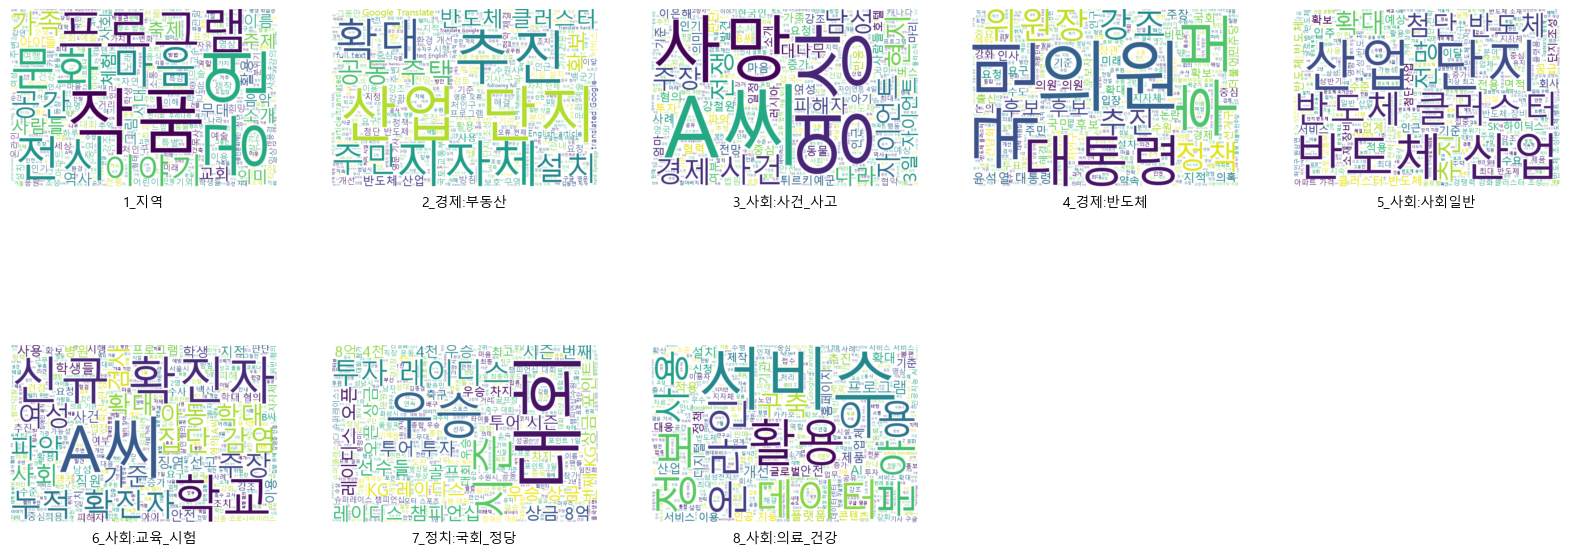

In [385]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

# 'text' 열 생성: '키워드' 열의 단어들을 쉼표로 구분하여 저장
train_df['text'] = train_df['키워드'].apply(lambda x: " ".join(x.split(',')))

num_categories = train_df["분류_대분류"].nunique()
num_cols = 5
num_rows = math.ceil(num_categories / num_cols)

fig = plt.figure(figsize=(num_cols * 4, num_rows * 4))

for w in range(num_categories):
    text_wc = " ".join(train_df.loc[train_df["분류_대분류"] == train_df["분류_대분류"].unique()[w], "text"].tolist())
    
    ax = fig.add_subplot(num_rows, num_cols, w + 1)
    wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400, max_words=500)
    wc.generate(text_wc)

    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    ax.text(0.5, -0.1, str(w + 1) + "_" + dict_label.get(w + 1, ""), size=10, ha="center", transform=ax.transAxes)

plt.show()

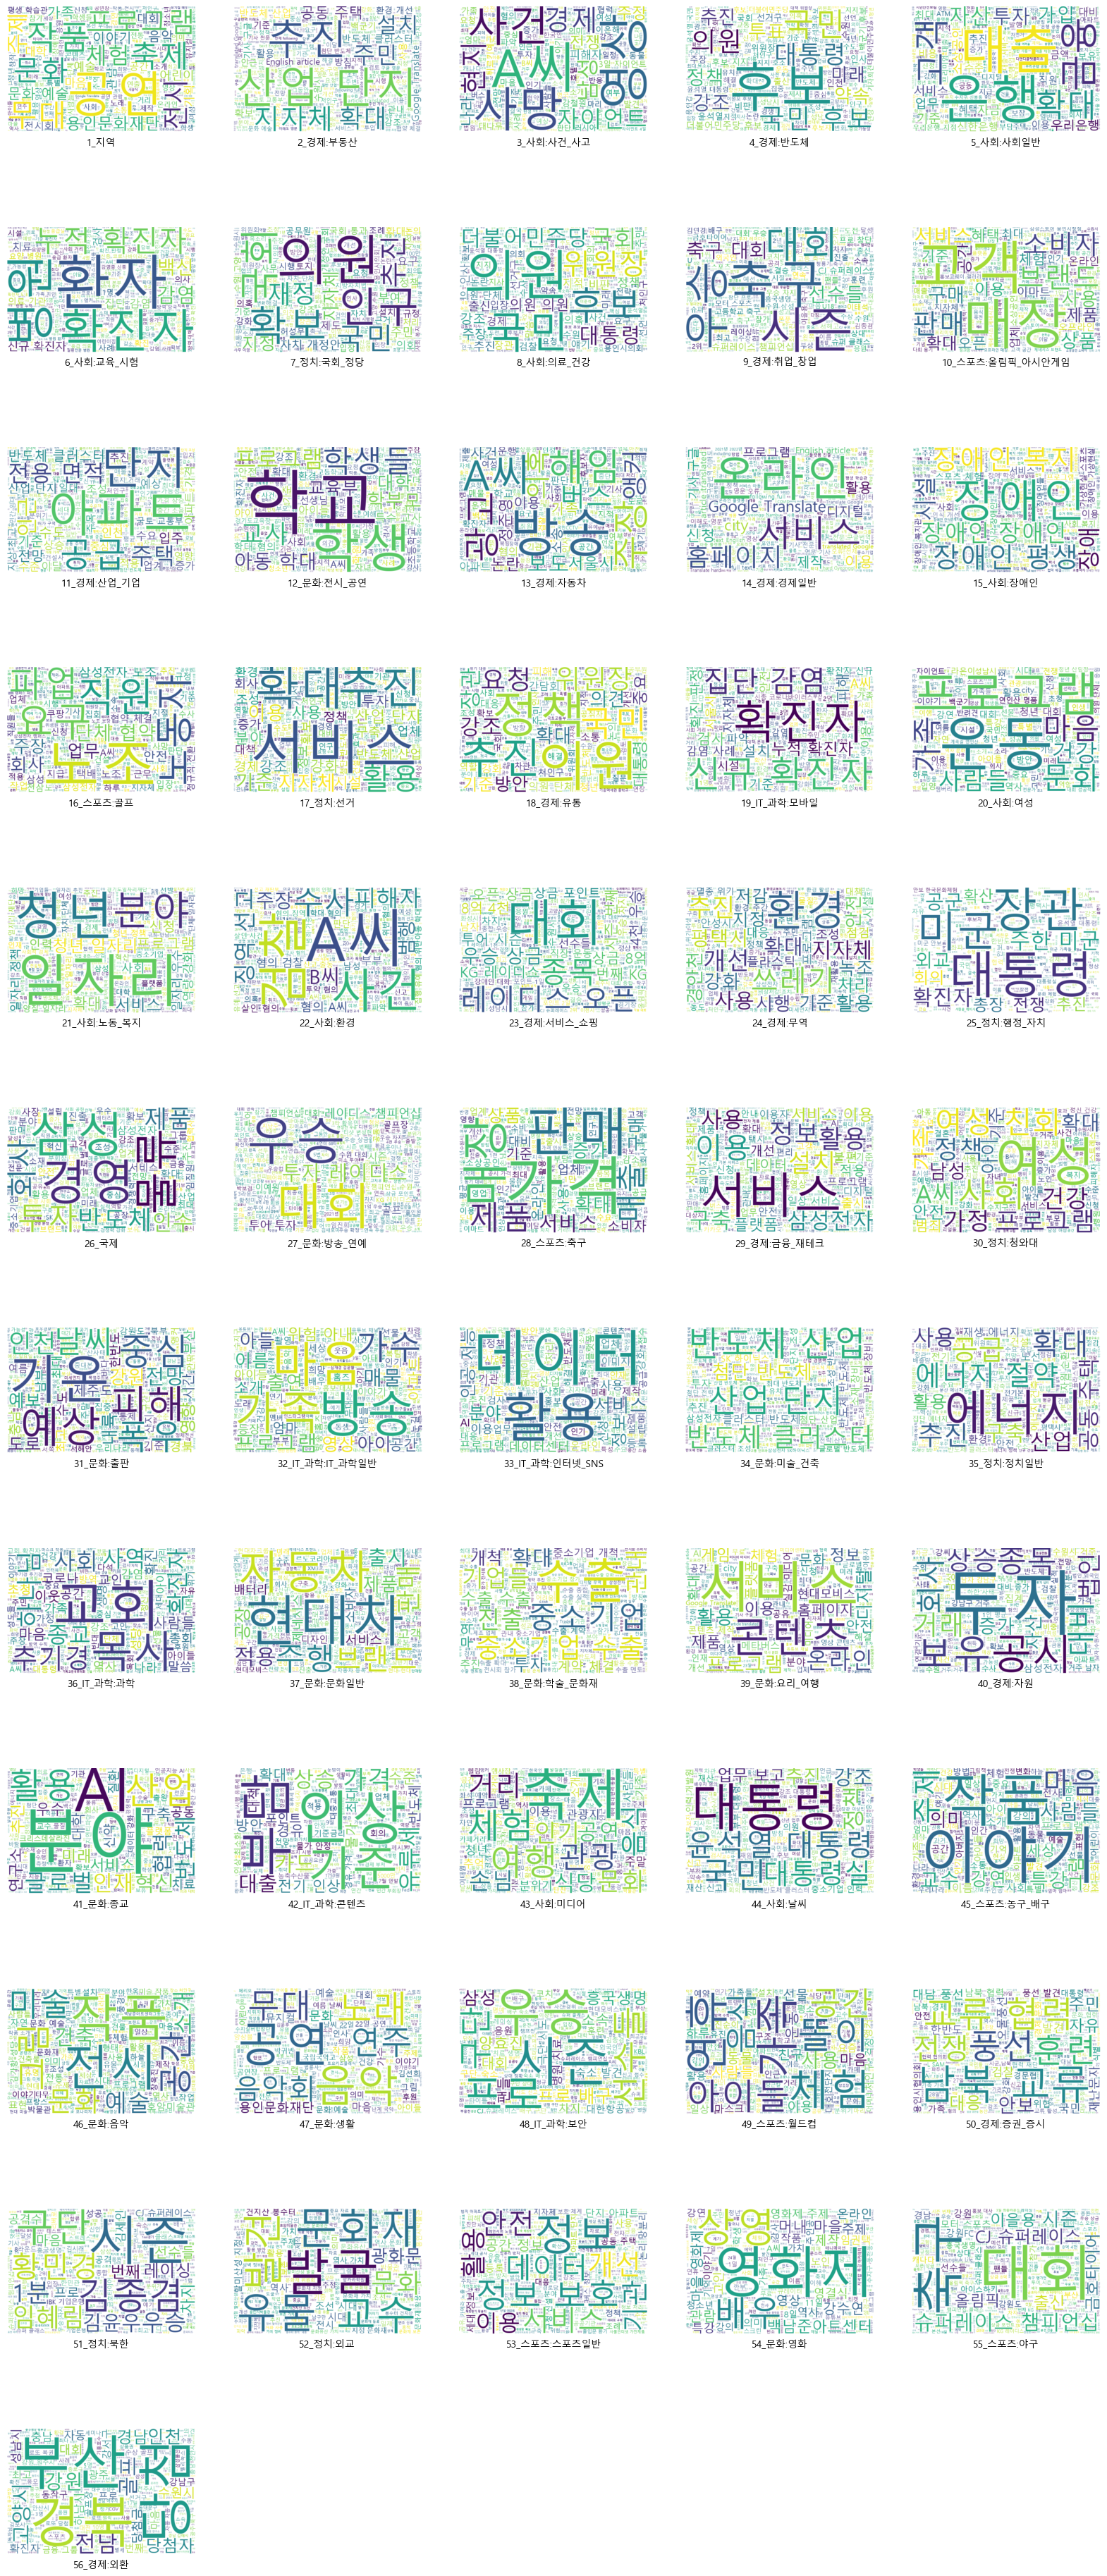

In [386]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

# 'text' 열 생성: '키워드' 열의 단어들을 쉼표로 구분하여 저장
train_df['text'] = train_df['키워드'].apply(lambda x: " ".join(x.split(',')))

num_categories = train_df["분류"].nunique()
num_cols = 5
num_rows = math.ceil(num_categories / num_cols)

fig = plt.figure(figsize=(num_cols * 4, num_rows * 4))

for w in range(num_categories):
    text_wc = " ".join(train_df.loc[train_df["분류"] == train_df["분류"].unique()[w], "text"].tolist())
    
    ax = fig.add_subplot(num_rows, num_cols, w + 1)
    wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400, max_words=500)
    wc.generate(text_wc)

    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    ax.text(0.5, -0.1, str(w + 1) + "_" + dict_label.get(w + 1, ""), size=10, ha="center", transform=ax.transAxes)

plt.show()

In [ ]:
train_df.drop(columns=['분류_대분류', '키워드_리스트', 'text'], inplace=True)
test_df.drop(columns=['키워드_리스트'], inplace=True)

In [391]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54609 entries, 0 to 54608
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      54609 non-null  object
 1   분류      54609 non-null  object
 2   제목      54609 non-null  object
 3   키워드     54609 non-null  object
 4   text    54609 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [393]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23405 entries, 0 to 23404
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      23405 non-null  object
 1   제목      23405 non-null  object
 2   키워드     23405 non-null  object
dtypes: object(3)
memory usage: 548.7+ KB


.